<a href="https://colab.research.google.com/github/rosie0520486/superstore/blob/main/textvector_chaeeun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 새 섹션

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-2-1467077172.py:9: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,

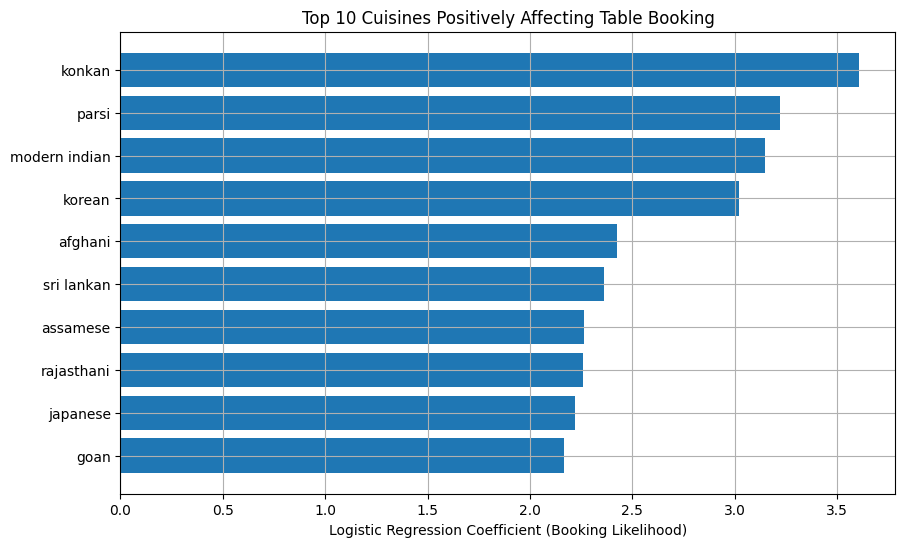

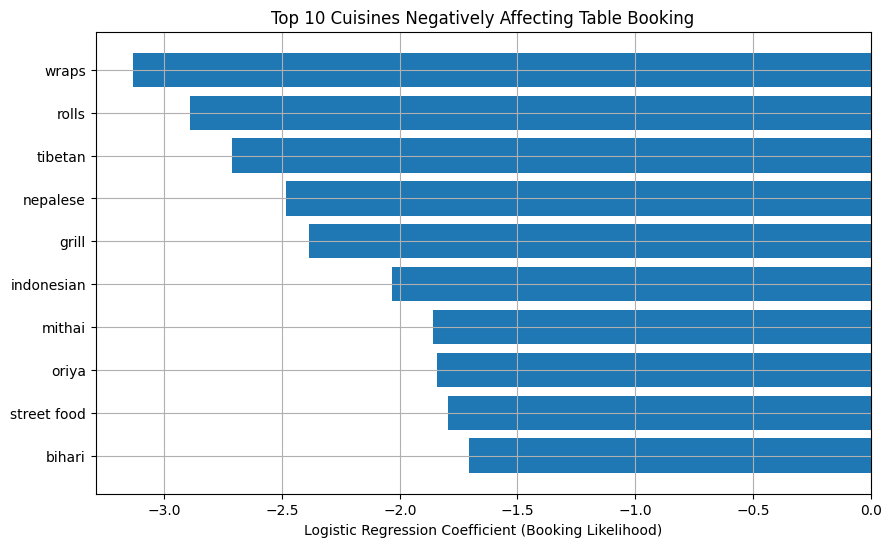

In [2]:
# 1.
from google.colab import drive
drive.mount('/content/drive')

# 2.
import pandas as pd

file_path = '/content/drive/MyDrive/zomato.csv'
df = pd.read_csv(file_path)

# 3.
df = df[['cuisines', 'book_table']].dropna()
df = df[df['book_table'].isin(['Yes', 'No'])]
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

# 4.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
X = vectorizer.fit_transform(df['cuisines'])
y = df['book_table']

# 5.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# 6.
import matplotlib.pyplot as plt

feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
importance_df = pd.DataFrame({'cuisine': feature_names, 'coef': coefficients})

top_positive = importance_df.sort_values(by='coef', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_positive['cuisine'], top_positive['coef'])
plt.title('Top 10 Cuisines Positively Affecting Table Booking')
plt.xlabel('Logistic Regression Coefficient (Booking Likelihood)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


# Sort by coefficient ascending (lowest = most negative impact)
top_negative = importance_df.sort_values(by='coef', ascending=True).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_negative['cuisine'], top_negative['coef'])
plt.title('Top 10 Cuisines Negatively Affecting Table Booking')
plt.xlabel('Logistic Regression Coefficient (Booking Likelihood)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()